This notebook is for testing pieces of code, exploring different packages, etc.

# Pandas DataFrames

In [1]:
# make 3D plots interactive
use_interactive_plots = True
if use_interactive_plots:
    %matplotlib widget

In [2]:
import tables

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Inserting a row

[Link](https://stackoverflow.com/questions/24284342/insert-a-row-to-pandas-dataframe)

In [3]:
s1 = pd.Series([5, 6, 7])
s2 = pd.Series([7, 8, 9])
cols = np.array((0.5, 1, 1.5))


df = pd.DataFrame([list(s1), list(s2)], columns = cols)
df

,0.5,1.0,1.5
0,5,6,7
1,7,8,9


In [4]:
df.loc[-1] = np.array([2, 3, 4]) # adding a row
df = df.sort_index()  # sorting by index
df

,0.5,1.0,1.5
-1,2,3,4
0,5,6,7
1,7,8,9


In [5]:
for t in df.index: # look at each time snapshot
    print(t)
    print(df.loc[t].index) # gets the x-axis (eg radius domain)
    print(df.loc[t].values) # gets the y-axis (eg warp values)

-1
Index([0.5, 1.0, 1.5], dtype='float64')
[2 3 4]
0
Index([0.5, 1.0, 1.5], dtype='float64')
[5 6 7]
1
Index([0.5, 1.0, 1.5], dtype='float64')
[7 8 9]


In [6]:
df = pd.DataFrame(columns = cols)
df.loc[10] = np.array([2+1j, 3+1j, 4+1j]) # adding a row
df

,0.5,1.0,1.5
10,2.0+1.0j,3.0+1.0j,4.0+1.0j


## Saving a DataFrame
[Link](https://stackoverflow.com/questions/17098654/how-to-reversibly-store-and-load-a-pandas-dataframe-to-from-disk)

In [7]:
file_path = "Data/temp.h5"
store_temp = pd.HDFStore(file_path)

store_temp['df'] = df  # save it
df_temp = store_temp['df']  # load it

In [8]:
df_temp

,0.5,1.0,1.5
10,2.0+1.0j,3.0+1.0j,4.0+1.0j


## Plotting 2D plots in different planes
[Link](https://matplotlib.org/stable/gallery/mplot3d/bars3d.html)

In [3]:
ts = np.array([1,2,3,4])

df = pd.DataFrame(data=np.array([[2,3,4],[3,4,5],[4,5,6],[7,8,9]]), index=ts, columns = [0.5, 1, 1.5])
df

,0.5,1.0,1.5
1,2,3,4
2,3,4,5
3,4,5,6
4,7,8,9


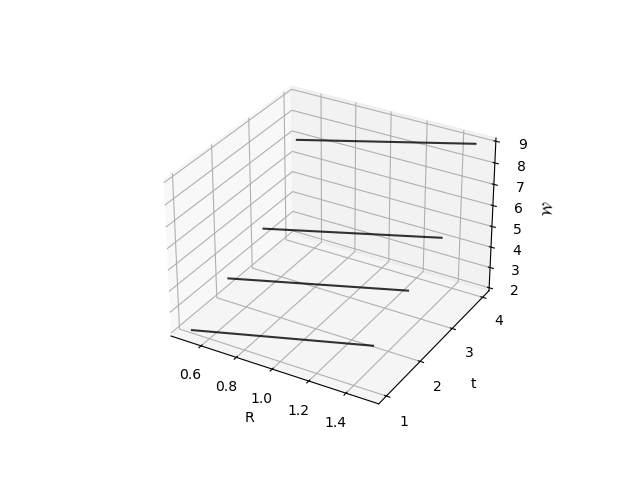

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ts = df.index
Rs = df.columns

for t in ts:
    # Generate the random data for the y=k 'layer'.
    Ws = df.loc[t].values

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.plot(Rs, Ws, zs=t, zdir='y', color="black", alpha=0.8)

ax.set_xlabel('R')
ax.set_ylabel('t')
ax.set_zlabel(r'$\mathcal{W}$')

# On the y-axis let's only label the discrete values that we have data for.
ax.set_yticks(df.index)

plt.show()